In [1]:
import os
from typing import List
import numpy as np
from PIL import Image, ImageOps
import torch
from carvekit.api.high import HiInterface

In [ ]:
interface = HiInterface(object_type="hairs-like",  # Can be "object" or "hairs-like".
                                     batch_size_seg=1,
                                     batch_size_matting=1,
                                     device='cuda' if torch.cuda.is_available() else 'cpu',
                                     seg_mask_size=320,  # Use 640 for Tracer B7 and 320 for U2Net
                                     matting_mask_size=1024,
                                     trimap_prob_threshold=231,
                                     trimap_dilation=1,
                                     trimap_erosion_iters=1,
                                     fp16=False)

In [158]:
interface = HiInterface(object_type="hairs-like",  # Can be "object" or "hairs-like".
                                     batch_size_seg=5,
                                     batch_size_matting=1,
                                     device='cuda' if torch.cuda.is_available() else 'cpu',
                                     seg_mask_size=320,  # Use 640 for Tracer B7 and 320 for U2Net
                                     matting_mask_size=2048,
                                     trimap_prob_threshold=231,
                                     trimap_dilation=1,
                                     trimap_erosion_iters=1,
                                     fp16=False)

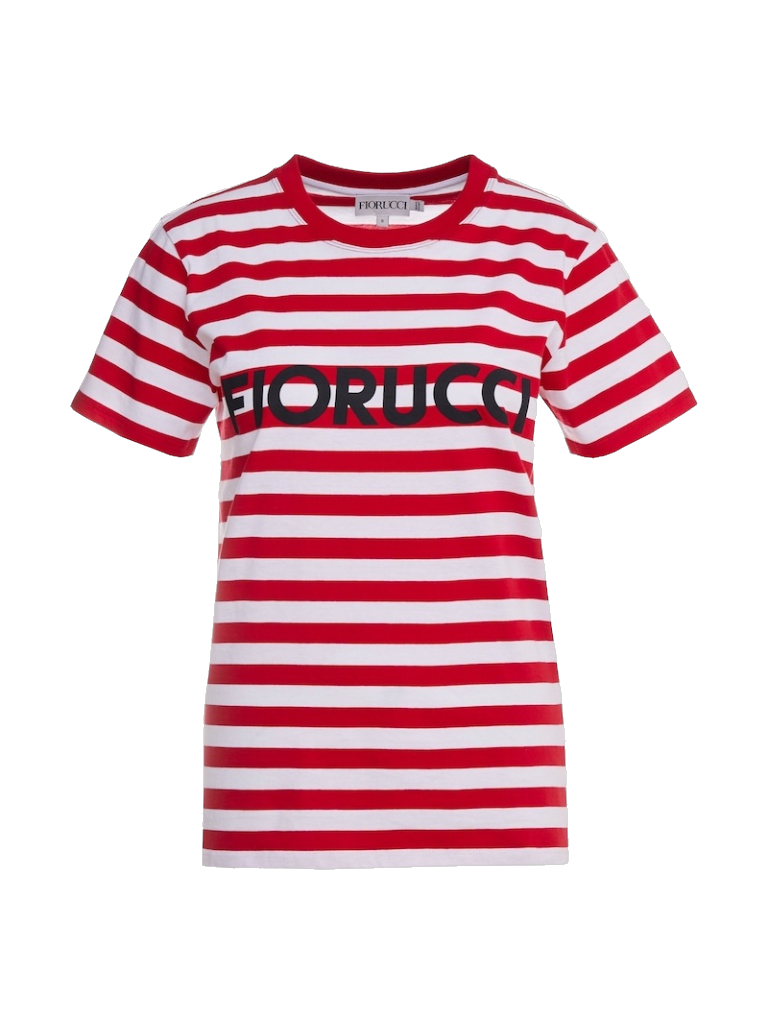

In [159]:
im = Image.open('datasets/images/06396_00.jpg')
images = interface([im])
images[0]

(1024, 768)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(1024, 768, 3)


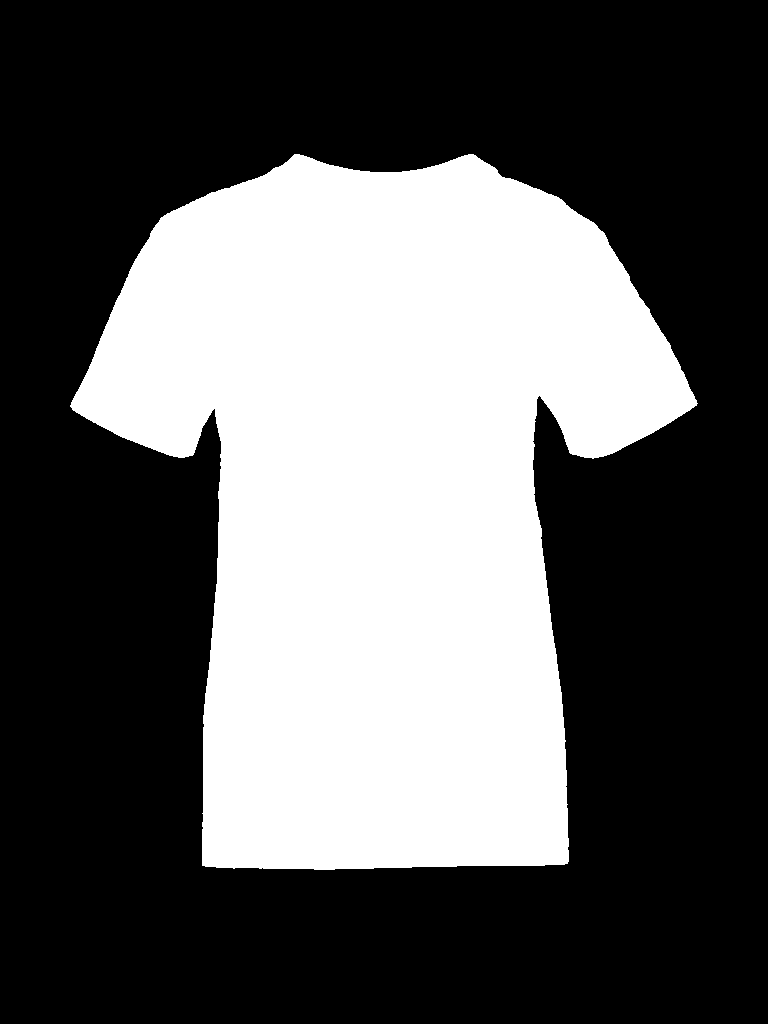

In [161]:
im=images[0]

# 将mask转换为黑白图，mask内为白色，mask外为黑色
img = np.array(im)
img = img[..., :3]  # no transparency
mask = np.any(img != [130, 130, 130], axis=-1)  # 判断非黑色像素

print(mask.shape)
print(mask)
img[mask] = [255, 255, 255]  # 将非黑色像素设置为白色
img[~mask] = [0, 0, 0]  # 将黑色像素设置为黑色
print(img.shape)
im = Image.fromarray(np.uint8(img))
im

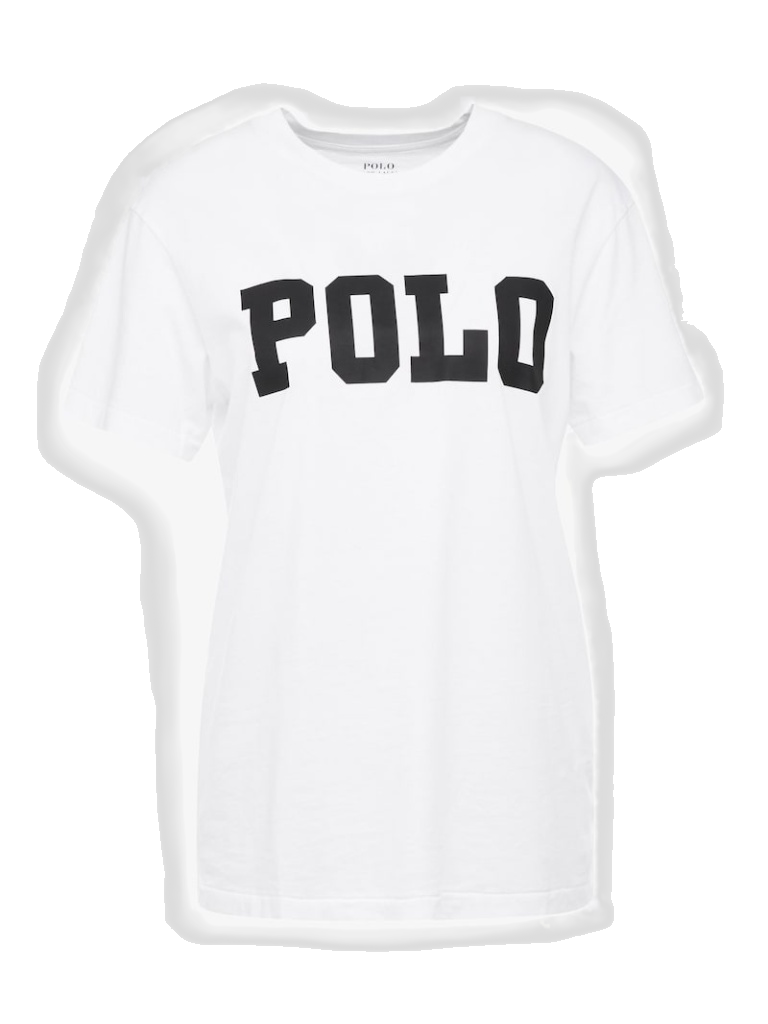

In [102]:
SHOW_FULLSIZE = False #param {type:"boolean"}
PREPROCESSING_METHOD = "none" #param ["stub", "none"]
SEGMENTATION_NETWORK = "tracer_b7" #param ["u2net", "deeplabv3", "basnet", "tracer_b7"]
POSTPROCESSING_METHOD = "fba" #param ["fba", "none"]
SEGMENTATION_MASK_SIZE = 640 #param ["640", "320"] {type:"raw", allow-input: true}
TRIMAP_DILATION = 30 #param {type:"integer"}
TRIMAP_EROSION = 5 #param {type:"integer"}
DEVICE = 'cpu' # 'cuda

config = MLConfig(segmentation_network=SEGMENTATION_NETWORK,
                  preprocessing_method=PREPROCESSING_METHOD,
                  postprocessing_method=POSTPROCESSING_METHOD,
                  seg_mask_size=SEGMENTATION_MASK_SIZE,
                  trimap_dilation=TRIMAP_DILATION,
                  trimap_erosion=TRIMAP_EROSION,
                  device=DEVICE)
images = interface(['datasets/images/00345_00.jpg'])
images[0]

(1024, 768)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(1024, 768, 3)


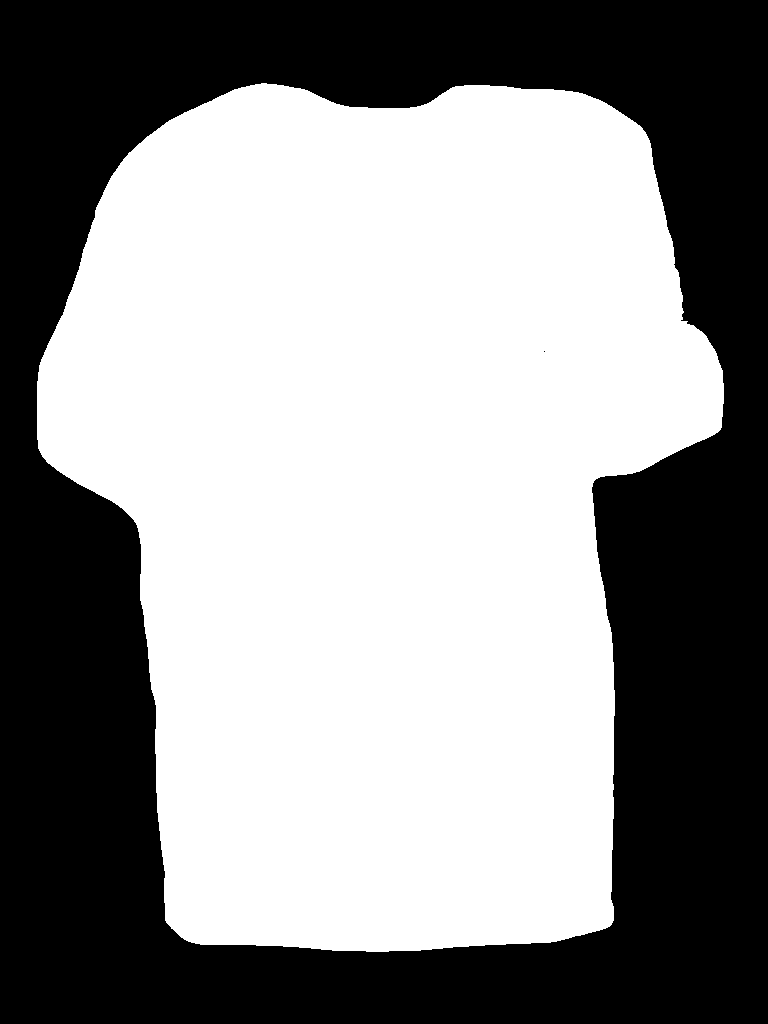

In [101]:
im=images[0]
# 将mask转换为黑白图，mask内为白色，mask外为黑色
img = np.array(im)
img = img[..., :3]  # no transparency
mask = np.any(img != [130, 130, 130], axis=-1)  # 判断非黑色像素

print(mask.shape)
print(mask)
img[mask] = [255, 255, 255]  # 将非黑色像素设置为白色
img[~mask] = [0, 0, 0]  # 将黑色像素设置为黑色
print(img.shape)
im = Image.fromarray(np.uint8(img))
im

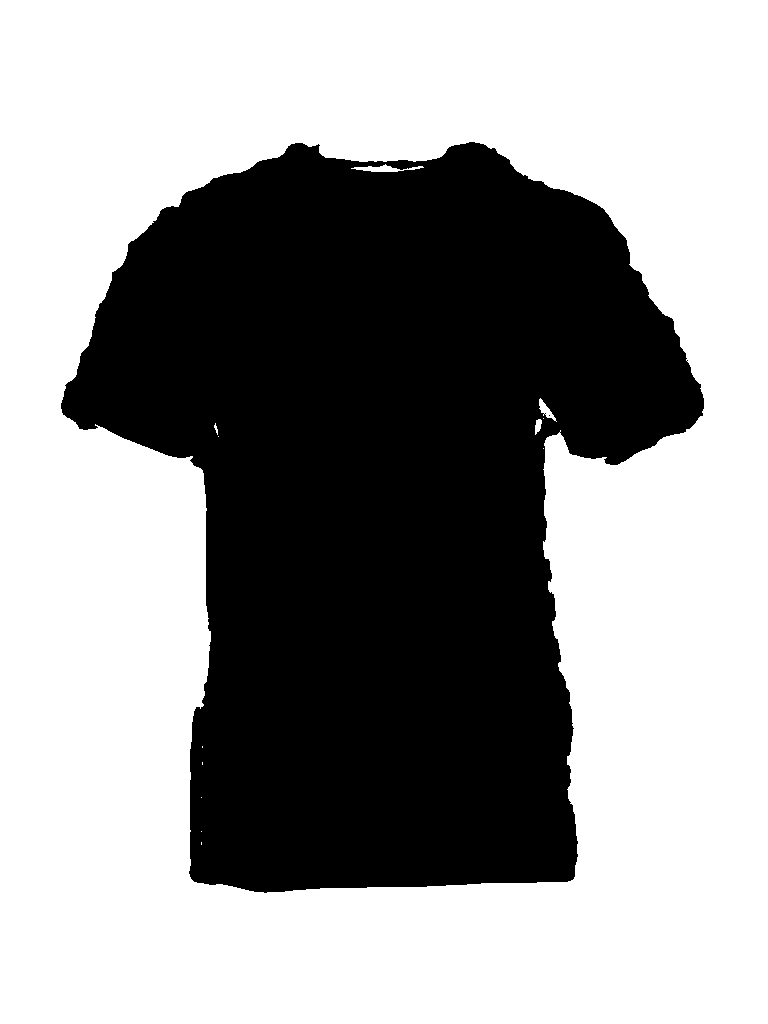

In [80]:
img = np.array(images[0])
img = img[...,:3] # no transparency
idx = (img[...,0]==130)&(img[...,1]==130)&(img[...,2]==130) # background 0 or 130, just try it
img = np.zeros(idx.shape)
img[idx] = 255
im = Image.fromarray(np.uint8(img))
im